<a href="https://colab.research.google.com/github/rohananpothle/Fuel_eff_pred_By_Rohan/blob/main/Fuel_eff_pred_By_Rohan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [232]:
import sqlite3

In [233]:
conn = sqlite3.connect('Database.db')

In [234]:
import sqlite3
conn = sqlite3.connect('/content/drive/MyDrive/DataAnalysis/Database.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
#cursor = conn.cursor()

In [235]:
for table in tables:
    print(table[0])

Electric_cars
Fraud_detection
Heart_disease
Insurance_Prediction
TripAdviser_Reviews
Ecommerce_data
Automobile_data
Supermarket_data


## Load the dataset

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#conn = sqlite3.connect('/content/drive/MyDrive/DataAnalysis/Database.db')
data = pd.read_sql_query('Select * from Automobile_data' , conn)
data = data.drop('r', axis=1)
data.head()

,m (kg),Mt,Ewltp (g/km),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),Fuel consumption,Electric range (km)
0,1262.0,1352.0,133.0,petrol,M,999.0,84.0,NaN,1.56,5.8,NaN
1,2434.0,2559.0,0.0,electric,E,NaN,300.0,193.0,NaN,NaN,445.0
2,1984.0,2095.0,0.0,electric,E,NaN,220.0,157.0,NaN,NaN,455.0
3,1314.0,1386.0,149.0,petrol,M,1498.0,78.0,NaN,NaN,6.6,NaN
4,1075.0,1145.0,119.0,lpg,B,1242.0,51.0,NaN,NaN,6.0,NaN


In [237]:
print('Before applying lower function')
print(data.Ft.unique())
print('After applying lower function')
data['Ft'] = data['Ft'].str.lower()
print(data.Ft.unique())

Before applying lower function
['petrol' 'electric' 'lpg' 'diesel' 'petrol/electric' 'hydrogen' 'ng'
 'e85' 'diesel/electric' 'PETROL/ELECTRIC' 'PETROL' 'DIESEL']
After applying lower function
['petrol' 'electric' 'lpg' 'diesel' 'petrol/electric' 'hydrogen' 'ng'
 'e85' 'diesel/electric']


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   m (kg)               999961 non-null   float64
 1   Mt                   951692 non-null   float64
 2   Ewltp (g/km)         998031 non-null   float64
 3   Ft                   1000000 non-null  object 
 4   Fm                   1000000 non-null  object 
 5   ec (cm3)             844323 non-null   float64
 6   ep (KW)              996696 non-null   float64
 7   z (Wh/km)            219176 non-null   float64
 8   Erwltp (g/km)        537925 non-null   float64
 9   Fuel consumption     703248 non-null   float64
 10  Electric range (km)  216965 non-null   float64
dtypes: float64(9), object(2)
memory usage: 83.9+ MB


## Preprocessing: Handling missing values and encoding

In [239]:
data.isnull().sum()

,0
m (kg),39
Mt,48308
Ewltp (g/km),1969
Ft,0
Fm,0
ec (cm3),155677
ep (KW),3304
z (Wh/km),780824
Erwltp (g/km),462075
Fuel consumption,296752


In [240]:
data['m (kg)'] = data['m (kg)'].fillna(data['m (kg)'].mean())
data['Mt'] = data['Mt'].fillna(data['Mt'].mean())
data['Ewltp (g/km)'] = data['Ewltp (g/km)'].fillna(data['Ewltp (g/km)'].mean())
data['ec (cm3)'] = data['ec (cm3)'].fillna(data['ec (cm3)'].mean())
data['ep (KW)'] = data['ep (KW)'].fillna(data['ep (KW)'].mean())
data['Fuel consumption '] = data['Fuel consumption '].fillna(data['Fuel consumption '].mean())
data['z (Wh/km)'] = data['z (Wh/km)'].fillna(data['z (Wh/km)'].mean())
data['Erwltp (g/km)'] = data['Erwltp (g/km)'].fillna(data['Erwltp (g/km)'].mean())
data['Electric range (km)'] = data['Electric range (km)'].fillna(data['Electric range (km)'].mean())

In [241]:
data.isnull().sum()

,0
m (kg),0
Mt,0
Ewltp (g/km),0
Ft,0
Fm,0
ec (cm3),0
ep (KW),0
z (Wh/km),0
Erwltp (g/km),0
Fuel consumption,0


In [242]:
from sklearn.preprocessing import LabelEncoder

label_encoder_Fm = LabelEncoder()
label_encoder_Ft = LabelEncoder()

data['Fm'] = label_encoder_Fm.fit_transform(data['Fm'])
data['Ft'] = label_encoder_Ft.fit_transform(data['Ft'])

In [243]:
data.head(11)

,m (kg),Mt,Ewltp (g/km),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),Fuel consumption,Electric range (km)
0,1262.0,1352.0,133.0,7,4,999.000000,84.0,171.866144,1.560000,5.800000,318.846067
1,2434.0,2559.0,0.0,3,1,1544.230079,300.0,193.000000,1.524854,5.412593,445.000000
2,1984.0,2095.0,0.0,3,1,1544.230079,220.0,157.000000,1.524854,5.412593,455.000000
3,1314.0,1386.0,149.0,7,4,1498.000000,78.0,171.866144,1.524854,6.600000,318.846067
4,1075.0,1145.0,119.0,5,0,1242.000000,51.0,171.866144,1.524854,6.000000,318.846067
5,1055.0,1177.0,123.0,7,4,1199.000000,61.0,171.866144,1.910000,5.500000,318.846067
6,1165.0,1317.0,112.0,0,4,1499.000000,75.0,171.866144,1.760000,4.300000,318.846067
7,2065.0,2156.0,45.0,8,5,1998.000000,120.0,190.000000,1.524854,2.000000,49.000000
8,1653.0,1775.0,24.0,8,5,1395.000000,110.0,148.000000,1.524854,1.100000,63.000000
9,1620.0,1717.0,127.0,0,4,1995.000000,110.0,171.866144,1.830000,4.800000,318.846067


In [244]:
print(label_encoder_Ft.classes_)
print(label_encoder_Fm.classes_)

['diesel' 'diesel/electric' 'e85' 'electric' 'hydrogen' 'lpg' 'ng'
 'petrol' 'petrol/electric']
['B' 'E' 'F' 'H' 'M' 'P']


## Seprating features and target

In [245]:
X = data.drop(columns = 'Fuel consumption ', axis=1)
y = data['Fuel consumption ']

In [246]:
feature_names = X.columns

## Train test and split

In [247]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [248]:
x_train.columns.to_list()

['m (kg)',
 'Mt',
 'Ewltp (g/km)',
 'Ft',
 'Fm',
 'ec (cm3)',
 'ep (KW)',
 'z (Wh/km)',
 'Erwltp (g/km)',
 'Electric range (km)']

## Not applying Feature Scaling since I wanted to use Random forest mode. As we know RF doesn't requires Sacling.

In [249]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

In [250]:
print(x_train.Ft.unique())
print(x_train.Fm.unique())

[7 0 3 8 1 5 2 6 4]
[4 3 1 5 0 2]


In [251]:
x_train.columns.to_list()

['m (kg)',
 'Mt',
 'Ewltp (g/km)',
 'Ft',
 'Fm',
 'ec (cm3)',
 'ep (KW)',
 'z (Wh/km)',
 'Erwltp (g/km)',
 'Electric range (km)']

In [252]:
x_train

,m (kg),Mt,Ewltp (g/km),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),Electric range (km)
566853,1650.0,1748.000000,203.0,7,4,2480.0,294.0,171.866144,1.524854,318.846067
382311,1800.0,1947.000000,147.0,0,3,1995.0,140.0,171.866144,1.630000,318.846067
241519,1369.0,1468.000000,130.0,7,3,999.0,92.0,171.866144,2.000000,318.846067
719220,1304.0,1412.000000,117.0,7,3,999.0,81.0,171.866144,1.524854,318.846067
905718,1280.0,1376.000000,133.0,7,4,1199.0,96.0,171.866144,1.524854,318.846067
...,...,...,...,...,...,...,...,...,...,...
259178,1319.0,1397.000000,121.0,7,3,999.0,92.0,171.866144,2.200000,318.846067
365838,1230.0,1339.000000,152.0,7,4,1499.0,83.0,171.866144,1.524854,318.846067
131932,1217.0,1655.708513,124.0,7,4,999.0,70.0,171.866144,1.200000,318.846067
671155,1900.0,2065.000000,190.0,7,3,2998.0,275.0,171.866144,1.524854,318.846067


## Initializing and training the model

In [253]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , random_state = 0)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

## Make predictions on the test set

In [254]:
y_pred = model.predict(x_test)

## Evaluate the model

In [255]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [256]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.13856546431512212
Root Mean Squared Error (RMSE): 0.3722438237434197
Mean Absolute Error (MAE): 0.08035123806740742
R-squared (R²): 0.9378915827840721


## Feature importance

               Feature  Importance
9  Electric range (km)    0.463582
2         Ewltp (g/km)    0.325432
6              ep (KW)    0.056357
1                   Mt    0.045322
3                   Ft    0.035167
7            z (Wh/km)    0.018667
8        Erwltp (g/km)    0.016156
0               m (kg)    0.015896
4                   Fm    0.014947
5             ec (cm3)    0.008473


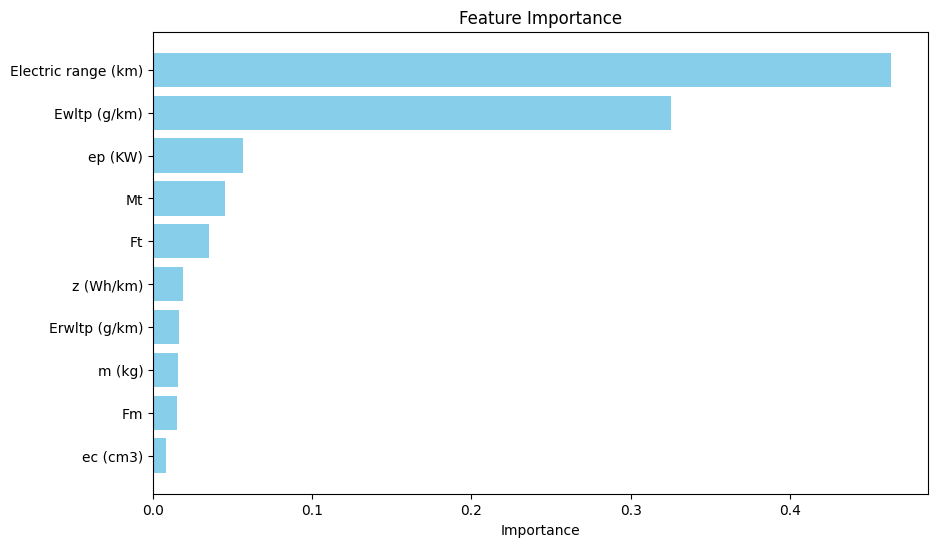

In [257]:
import pandas as pd
import matplotlib.pyplot as plt

features = feature_names

feature_importance = model.feature_importances_

assert len(features) == len(feature_importance), "Number of features does not match the number of importances"

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
final_features = x_train.columns.to_list()

## Saving the trained model

In [258]:
# To save the model and encoder and final_features
import joblib
joblib.dump(model, 'fuel_consumption_model.pkl')
# Save encoders
joblib.dump(label_encoder_Fm, 'label_encoder_Fm.pkl')
joblib.dump(label_encoder_Ft, 'label_encoder_Ft.pkl')

#saving X_train_features
joblib.dump(final_features, 'final_features.pkl')

['final_features.pkl']

In [ ]:
# Download the Pkl files
from google.colab import files
files.download('fuel_consumption_model.pkl')
files.download('label_encoder_Fm.pkl')
files.download('label_encoder_Ft.pkl')
files.download('final_features.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If requires,

Upload the Pkl file

from google.colab import files

uploaded = files.upload()

In [259]:
# Load model, encoders and scaler
model = joblib.load('fuel_consumption_model.pkl')
label_encoder_Fm = joblib.load('label_encoder_Fm.pkl')
label_encoder_Ft = joblib.load('label_encoder_Ft.pkl')
final_features = joblib.load('final_features.pkl')

In [260]:
print(label_encoder_Ft.classes_)
print(label_encoder_Fm.classes_)

['diesel' 'diesel/electric' 'e85' 'electric' 'hydrogen' 'lpg' 'ng'
 'petrol' 'petrol/electric']
['B' 'E' 'F' 'H' 'M' 'P']


In [264]:
def get_user_input():
    input_data = {}

    # Step 1: Collect numerical inputs
    input_data['m (kg)'] = float(input("Enter m (kg) (e.g., 1262.5): "))
    input_data['Mt'] = float(input("Enter Mt (e.g., 1352.5): "))
    input_data['Ewltp (g/km)'] = float(input("Enter Ewltp (g/km) (e.g., 133.0): "))
    input_data['ec (cm3)'] = float(input("Enter ec (cm3) (e.g., 10.0): "))
    input_data['ep (KW)'] = float(input("Enter ep (KW) (e.g., 4.0): "))
    input_data['z (Wh/km)'] = float(input("Enter z (Wh/km) (e.g., 999.0): "))
    input_data['Erwltp (g/km)'] = float(input("Enter Erwltp (g/km) (e.g., 84.0): "))
    input_data['Electric range (km)'] = float(input("Enter Electric range (km) (e.g., 171.86): "))

    # Step 2: Collect categorical inputs
    Fm_input = input("Enter Fm (e.g., 'B', 'E', 'F', 'H', 'M', 'P'): ")
    Ft_input = input("Enter Ft (e.g., 'diesel', 'diesel/electric', 'e85', 'electric', 'hydrogen', 'lpg', 'ng', 'petrol', 'petrol/electric'): ")

    # Step 3: Encode categorical inputs
    try:
        input_data['Fm'] = label_encoder_Fm.transform([Fm_input])[0]
        input_data['Ft'] = label_encoder_Ft.transform([Ft_input])[0]
    except ValueError as e:
        print("Invalid category input:", e)
        return None

    # Step 4: Reorder to match training column order
    df_input = pd.DataFrame([input_data])
    df_input = df_input[final_features]  # Ensure feature order matches training

    return df_input


In [265]:
2# Use input
user_input = get_user_input()
print('\n')
user_input

Enter m (kg) (e.g., 1262.5): 123
Enter Mt (e.g., 1352.5): 23
Enter Ewltp (g/km) (e.g., 133.0): 3
Enter ec (cm3) (e.g., 10.0): 23
Enter ep (KW) (e.g., 4.0): 23
Enter z (Wh/km) (e.g., 999.0): 23
Enter Erwltp (g/km) (e.g., 84.0): 23
Enter Electric range (km) (e.g., 171.86): 23
Enter Fm (e.g., 'B', 'E', 'F', 'H', 'M', 'P'): F
Enter Ft (e.g., 'diesel', 'diesel/electric', 'e85', 'electric', 'hydrogen', 'lpg', 'ng', 'petrol', 'petrol/electric'): hydrogen




,m (kg),Mt,Ewltp (g/km),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),Electric range (km)
0,123.0,23.0,3.0,4,2,23.0,23.0,23.0,23.0,23.0


In [266]:
# Predict
prediction = model.predict(user_input)
print("Predicted Output:", prediction[0])

Predicted Output: 4.954820227146043


## The goal of this project was to build a machine learning model that predicts the fuel consumption of a vehicle based on various input features. These features include attributes such as the vehicle's mass, engine capacity, fuel type, energy consumption, and other vehicle characteristics.

Data Cleaning: Missing values were handled by replacing them with the mean of the respective columns, ensuring there were no gaps in the dataset.

Feature Selection: The dataset consisted of multiple features such as:

1- m (kg): Vehicle mass
2- Mt: Maximum torque
3- Ewltp (g/km): Energy consumption in g/km
4- ec (cm3): Engine capacity
and many more..

Feature Scaling: A StandardScaler was applied to scale the features before feeding them into the machine learning model.

Model Selection: A RandomForestRegressor model was selected for its robustness and ability to handle non-linear relationships.

Model Training
The RandomForestRegressor model was trained using the processed features. The training process involved fitting the model to the data, which allowed it to learn the relationship between the input features and the target variable (fuel consumption).

Model Evaluation
After training the model, several metrics were computed to evaluate its performance:

Mean Squared Error (MSE):

Value: 0.1386
MSE measures the average squared difference between predicted and actual values. A lower MSE means better performance. In this case, an MSE of 0.1386 indicates that the model makes relatively small prediction errors.

Root Mean Squared Error (RMSE):

Value: 0.3722
RMSE provides a more interpretable measure of error in the same units as the target variable (fuel consumption). The RMSE of 0.3722 indicates that, on average, the model's predictions are off by 0.3722 units.

Mean Absolute Error (MAE):

Value: 0.0804
MAE gives the average of absolute differences between predicted and actual values. A lower MAE value indicates better performance.

R-squared (R²):

Value: 0.9379
R² measures the proportion of the variance in the target variable that is predictable from the input features. An R² value of 0.9379 means that the model explains nearly 94% of the variance in fuel consumption, indicating a strong model fit.

#### The RandomForestRegressor model for predicting vehicle fuel consumption has performed exceptionally well, with an R² of nearly 94%, indicating that the model can predict fuel consumption with high accuracy. The model's error metrics (MSE, RMSE, and MAE) are all low, indicating that the predictions are close to the actual values.